# Exercise 1 notebook B

The submission deadline is **27.11.2023 23:59.** Late submission is possible up to one week after the deadline.
When submitting late, three points will be deducted for each started day.

Please write your own student_id in the same format as in the example (especially using the same variable name) where it says "YOUR CODE HERE".

In [1]:
# Please enter your student ID here

student_id = 42 # this is just an example
# YOUR CODE HERE
student_id = 12331442

## Task Description    
    
This is the second part of the exercise. For better comparability, please load our prepared data for solving this exercise and do not use the dataset that you created in Part 1A.

The goal of this exercise is to train a machine learning (ML) model on the data we prepared in the first notebook. The goal of the model is to predict the type of disruption (`disruption`) given the features (all other columns, like temperature etc.).

First we will visualize the data to get a better understanding, then we will identify suitable machine learning methods and train a model.
Finally we will test the trained ML model on a holdout test dataset.

Out of the total 100 points, this notebook makes up for 45 points.

**Notebook A (data preparation), 55 points:**
 - Task 1: 20 points
 - Task 2: 15 points
 - Task 3: 10 points
 - Task 4: 5 points
 - Task 5: 5 points

**Notebook B (this notebook), 45 points:**
 - Task 6: 15 points (Visualization)
 - Task 7: 25 points (Train models)
 - Task 8: 5 points (Test models)

## Setup Python and load data
Import necessary Python modules and load the preprocessed data from the shared folder.

### Add imports

In [2]:
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn

import typing

### Load data
Load the preprocessed data from the shared folder: 

In [3]:
with open(os.path.join(os.environ["HOME"], "shared", "188.995-2023W", "data", "data_processed.pickle"),"rb") as fp:
    data_processed = pickle.load(fp)

As you know from the previous exercise, our data is not in a good state and needs some cleaning. Same holds true in this case. In the disruption column we have different descriptions meaning the same thing. With the following code we can group these things together to get a much clearer picture:

In [4]:
# mapping dictionary

mapping = {
    'Polizeieinsatz': 'Einsatz',
    'Rettungseinsatz': 'Einsatz',
    'Polizeieinsatz Verspätungen': 'Einsatz',
    'Feuerwehreinsatz': 'Einsatz',
    'Rettungseinsatz Verspätungen': 'Einsatz',
    'Schadhaftes Fahrzeug': 'Fahrzeug in schlechtem Zustand',
    'Wagengebrechen': 'Fahrzeug in schlechtem Zustand',
    'Schadhafter Zug': 'Fahrzeug in schlechtem Zustand',
    'Fahrzeug Verspätungen': 'Fahrzeug in schlechtem Zustand',
    'Fahrzeug': 'Fahrzeug in schlechtem Zustand',
    'erhöhtes Fahrgastaufkommen': 'Erhoehtes Fahrgastaufkommen',
    'Erhöhtes Fahrgastaufkommen': 'Erhoehtes Fahrgastaufkommen',
    'Verspätungen': 'Verspaetung',
    'Verspätung': 'Verspaetung',
    'Verkehrsunfall Verspätungen': 'Verkehrsunfall',
    'Verkehrsunfall': 'Verkehrsunfall',
    'Fremder Verkehrsunfall': 'Verkehrsunfall',
    'Verkehrsstörung Verspätungen': 'Verkehrsstoerung',
    'Verkehrsbedingte Verspätung': 'Verkehrsstoerung',
    'Verkehrsbedingte Verspätung': 'Verkehrsstoerung',
    'Verkehrsbedingte ': 'Verkehrsstoerung',
    'Verkehrsstörung': 'Verkehrsstoerung',
    'Verkehrsbedingt Verspätungen': 'Verkehrsstoerung',
    'Veranstaltung': 'Veranstaltung',
    'Vienna': 'Veranstaltung',
    'Regenbogenparade': 'Veranstaltung',
    'Demonstration': 'Veranstaltung',
    'Staatsbesuch': 'Veranstaltung',
    'Opernball': 'Veranstaltung',
    'Erkrankung eines': 'Personalprobleme',
    'Erkrankung': 'Personalprobleme',
    'Fahrleitungsgebrechen': 'Allgemeine Infrastruktur',
    'Wasserrohrgebrechen': 'Allgemeine Infrastruktur',
    'Stromstörung': 'Allgemeine Infrastruktur',
    'Gasrohrgebrechen': 'Allgemeine Infrastruktur',
    'Gleisschaden': 'Infrastruktur fuer Befoerderung',
    'Weichenstörung': 'Infrastruktur fuer Befoerderung',
    'Gleisbauarbeiten': 'Infrastruktur fuer Befoerderung',
    'Signalstörung': 'Infrastruktur fuer Befoerderung',
    'Signalstörung Verspätungen': 'Infrastruktur fuer Befoerderung',
    'Stellwerkstörung': 'Infrastruktur fuer Befoerderung',
    'Betriebsstörung': 'Betriebsstoerung',
    'Betriebseinstellung': 'Betriebsstoerung',
    'Fahrtbehinderung': 'Mutwilligkeit',
    'Sachbeschädigung': 'Mutwilligkeit',
    'Falschparker': 'Mutwilligkeit',
    'Witterungsbedingt': 'Witterung',
    'Sturmschaden': 'Witterung',
    'Bauarbeiten': 'Bauarbeiten',
    'Umleitung': 'Bauarbeiten',
    'Verunreinigung': 'Verunreinigung'
}

# Use the replace method to update the column
data_processed['disruption'] = data_processed['disruption'].replace(mapping)

Now transform the values from your target column `disruption` and save the new values in the new column `class`.

In [5]:
from sklearn.preprocessing import LabelEncoder

target_column = 'disruption'

# YOUR CODE HERE
label_encoder = LabelEncoder()

# Fit the encoder to the target column
label_encoder.fit(data_processed[target_column])

# Transform the target column
data_processed['class'] = label_encoder.transform(data_processed[target_column])

In [6]:
data_processed.tail()

temp_dailyMin  temp_dailyMax  temp_dailyMean  \
year month day                                                 
2021 12    31            12.9           15.9       14.033333   
           31            12.9           15.9       14.033333   
           31            12.9           15.9       14.033333   
           31            12.9           15.9       14.033333   
           31            12.9           15.9       14.033333   

                temp_dailyMedian  hum_dailyMin  hum_dailyMax  hum_dailyMean  \
year month day                                                                
2021 12    31               13.3            62            77      70.333333   
           31               13.3            62            77      70.333333   
           31               13.3            62            77      70.333333   
           31               13.3            62            77      70.333333   
           31               13.3            62            77      70.333333   

                wind_dailyMin  wind_dailyMax  wind_dailyMean  precip  \
year month day                                                         
2021 12    31               3              4        3.333333    0.01   
           31               3              4        3.333333    0.01   
           31               3              4        3.333333    0.01   
           31               3              4        3.333333    0.01   
           31               3              4        3.333333    0.01   

                                    disruption    bus  subway   tram  \
year month day                                                         
2021 12    31                      Verspaetung  False    True  False   
           31   Fahrzeug in schlechtem Zustand  False   False   True   
           31   Fahrzeug in schlechtem Zustand   True   False  False   
           31                      Verspaetung  False    True  False   
           31                          Einsatz   True   False  False   

                      duration  class  
year month day                         
2021 12    31  0 days 00:50:00     14  
           31  0 days 01:23:00      5  
           31  0 days 01:08:00      5  
           31  0 days 01:11:00     14  
           31  0 days 01:15:00      3

In [7]:
assert data_processed.shape[0] > 66000, "there should be more than 66000 rows in the merged dataset"
assert data_processed.shape[1] >= 17, "5 columns for disruptions, 11 feature columns, 1 class column"

assert not data_processed.isna().any().any(), "All missing values should be eliminated!"
assert not data_processed['disruption'].isna().any(), "The dataframe must have a disruption column!"
assert not data_processed['bus'].isna().any(), "The dataframe must have a bus column!"
assert not data_processed['subway'].isna().any(), "The dataframe must have a subway column!"
assert not data_processed['tram'].isna().any(), "The dataframe must have a tram column!"
assert not data_processed['duration'].isna().any(), "The dataframe must have a duration column!"

In [8]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Due to performance reasons we only use a fraction of the overall data set for our computations:

In [9]:
data_processed = data_processed.sample(frac=0.5, random_state=student_id)

We create a shortened version of a dataframe without the `disruption` column that will then be used to train a model:

In [10]:
data_shortened = data_processed.drop(columns=['disruption']) # we drop disruption since it is mapped to our new target variable 'class'
data_shortened.head()

,,,temp_dailyMin,temp_dailyMax,temp_dailyMean,temp_dailyMedian,hum_dailyMin,hum_dailyMax,hum_dailyMean,wind_dailyMin,wind_dailyMax,wind_dailyMean,precip,bus,subway,tram,duration,class
year,month,day,,,,,,,,,,,,,,,,
2021,8,12,19.5,28.4,24.333333,25.1,46,70,57.333333,1,1,1.000000,0.0,False,True,False,0 days 02:31:00,3
2018,8,1,24.8,30.9,27.200000,25.9,45,64,57.333333,1,2,1.666667,0.0,True,False,False,0 days 00:47:00,3
2014,9,2,13.5,14.7,14.266667,14.6,94,95,94.666667,3,4,3.333333,13.1,False,False,True,0 days 01:59:00,14
2016,8,7,18.9,24.9,22.266667,23.0,43,69,56.000000,2,3,2.333333,0.0,False,False,True,0 days 02:15:00,5
2019,7,26,24.1,34.4,30.100000,31.8,26,61,38.333333,1,2,1.666667,0.0,False,False,True,0 days 02:24:00,5


## Task 6: Visualization (15 Poins)

To better understand the dataset, create visualizations of the merged data using `pandas`, `matplotlib` or `seaborn` that help explore potential relationships between the variables before developing a model.
We are particularly interested in the relationships of the variable to be modeled (`disruptions`) with the other columns (later features).

- Create multiple figures using different diagram types.
- Make at least **3 different plots** and use **2 different plot types** and **2 different libraries**
- Use a proper labeling: include title, axis labels, legends, ... Your plots should present information clearly! -> http://imgs.xkcd.com/comics/convincing.png). 

- Use the section **Findings** at the end to describe your thought process and insights when creating a particular plot.

**Note:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions without understanding and justification.


To gain valuable insights on the data, you might wanna look at the overall development over time, have a closer look at one specific year (e.g. 2021) or compare different years. For a better overview, you could also plot the top n most frequently occurring disruptions in more detail or their occurencies over the year. 
We want you to get good insights into the dataset, therefore please explore the dataset in depth, try different visualization libraries and do not only use the visualizations described by us.

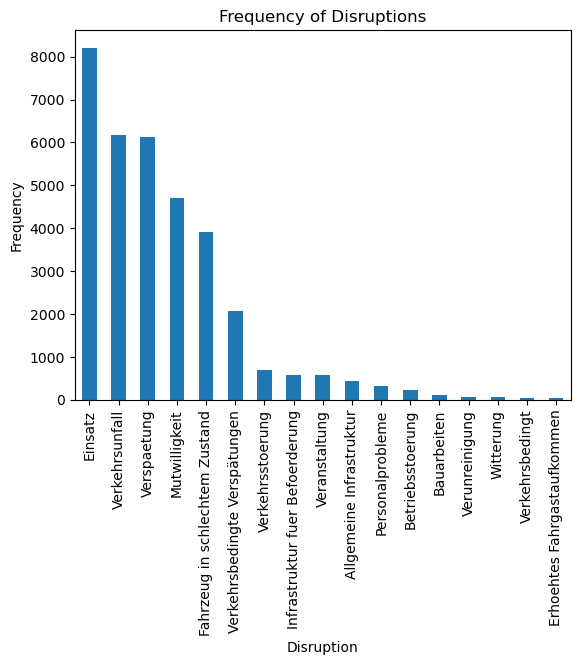

In [11]:
# YOUR CODE HERE
# Bar plot using Pandas
top_disruptions = data_processed['disruption'].value_counts()
top_disruptions.plot(kind='bar')
plt.title('Frequency of Disruptions')
plt.xlabel('Disruption')
plt.ylabel('Frequency')
plt.show()

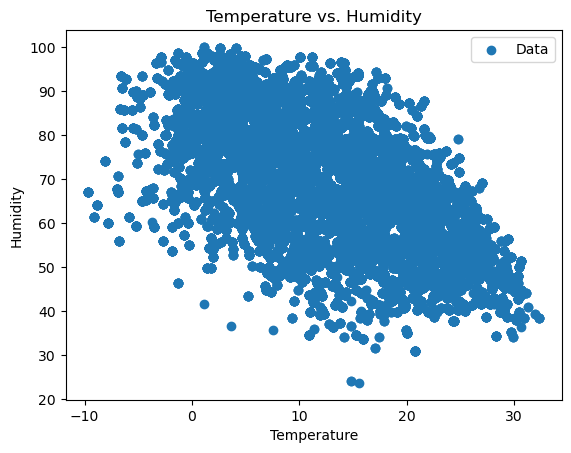

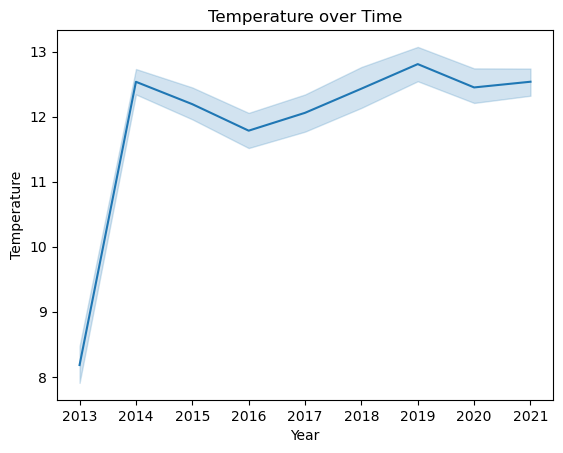

In [79]:

# Scatter plot using Matplotlib
plt.scatter(data_processed['temp_dailyMean'], data_processed['hum_dailyMean'])
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(['Data'])
plt.show()

# Line plot using Seaborn
sns.lineplot(data=data_processed, x='year', y='temp_dailyMean')
plt.title('Temperature over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

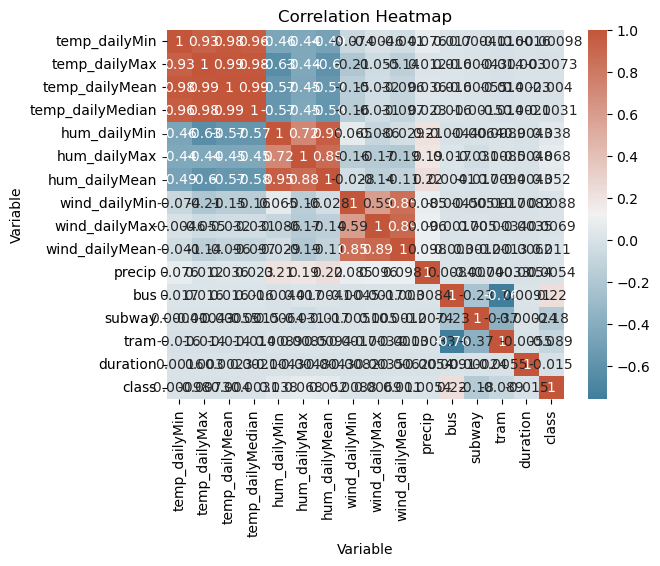

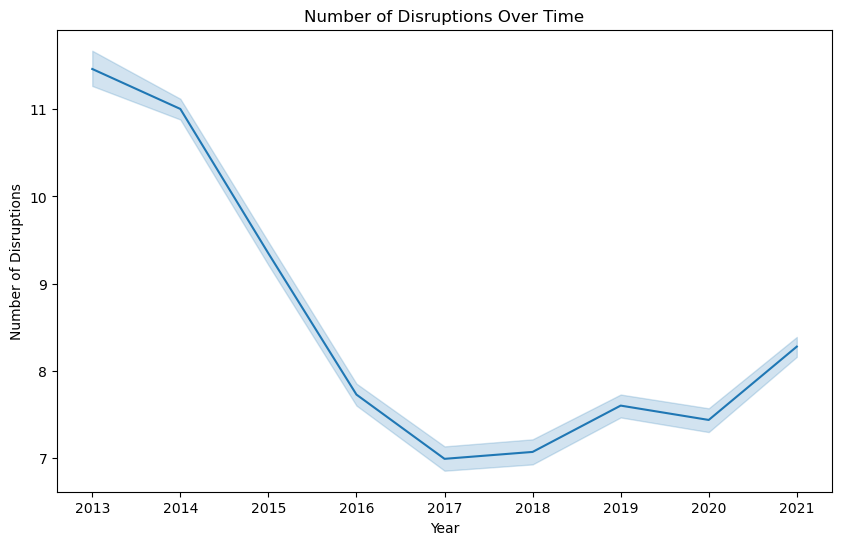

In [12]:

# Compute the correlation matrix
correlation_matrix = data_shortened.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True,  cmap=cmap)
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Heatmap')
plt.show()

# Number of Disruptions over time
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='class', data=data_processed)
plt.title('Number of Disruptions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disruptions')
plt.show()

In [13]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Findings 
Summarize your findings. Restrict your answer to not more than 100 words.

YOUR ANSWER HERE
The scatter plot shows a positive correlation between temperature and humidity. This suggests that as the temperature increases, the humidity also increases. The disruptions from Einsatz have the highest frequency(8000) to Erhoehtes Fahrgastaufkommen which has the lowest frequency (less than 1000) of disruptions.

The bus, subway, and tram variables do not show strong correlation with the other variables. This suggests that the mode of transportation might not have a strong linear relationship with the weather conditions or the disruption class. The class variable (disruption) also does not show strong correlation with any of the weather or transportation variables.

From the lineplot, the number of disruptions decreased from 2013 to 2016, then we see an increase from 2017 to 2019.The number of disruptions decreased again from 2019 to 2021.

# Classification models

## Task 7: Model for disruption class prediction (25 Points)

Build and train a model using weather and traffic data from 2013 until 2021 (incl.) using `scikit-learn`.

You have to do the following steps:

1. Separate hidden test data - **1**
1. First ML experiments - **3**
1. Explore the different metrics - **3**
1. Explore different scaling approaches - **3**
1. Experiment with different train/valid splits - **3**
1. Experiment with different feature selection methods - **3**
1. Try out different ML algorithms - **3**
1. Explore the effect of parameters with 10-fold cross-validation - **3**
1. Present your best performing results - **3**

General advices: Make sure your results are reproducible. You can use your student ID as seed.

### 7.1 Separate hidden test data

Split the `data_shortened` DataFrame into train (this will be further split to train and validation) and test sets.
- Train & validation set: 80% of the overall data set
- Test set: remaining 20% of the data

In [14]:
target_column = 'class'

Convert entries in the `duration` column from `Timedelta` to floating-point number `numpy.float64`, so that this column can be also used as a feature to train a classifier:

In [15]:
data_shortened['duration'] = (data_shortened['duration'] - data_shortened['duration'].min())  / np.timedelta64(1,'D')

In [16]:
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame, test_size=0.2) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:

    # YOUR CODE HERE
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=student_id)
    
    return df_train, df_test

In [17]:
data_train, data_test = split_data(data_shortened)

In [18]:
# check split boundaries
data_train.tail()

,,,temp_dailyMin,temp_dailyMax,temp_dailyMean,temp_dailyMedian,hum_dailyMin,hum_dailyMax,hum_dailyMean,wind_dailyMin,wind_dailyMax,wind_dailyMean,precip,bus,subway,tram,duration,class
year,month,day,,,,,,,,,,,,,,,,
2017,1,13,1.8,5.1,3.233333,2.8,54,79,69.666667,2,5,4.000000,0.4,False,False,True,0.185417,0
2019,12,8,1.9,10.3,5.300000,3.7,53,90,77.333333,1,2,1.333333,0.0,False,False,True,0.215972,9
2020,8,28,17.1,29.5,23.966667,25.3,38,66,53.000000,1,4,2.666667,0.0,False,False,True,0.083333,7
2019,7,28,19.6,25.6,23.066667,24.0,65,86,75.000000,2,3,2.666667,11.6,True,False,False,0.022222,3
2015,9,3,15.9,21.9,19.400000,20.4,55,74,64.333333,1,2,1.666667,9.7,True,False,False,0.128472,10


In [19]:
data_test.head()

temp_dailyMin  temp_dailyMax  temp_dailyMean  \
year month day                                                 
2018 3     16             7.2            9.8        8.400000   
2016 11    19             4.9           14.4        9.633333   
2018 6     7             18.7           23.0       21.500000   
     3     10             4.5           14.2        9.600000   
2014 6     25            13.8           22.9       17.500000   

                temp_dailyMedian  hum_dailyMin  hum_dailyMax  hum_dailyMean  \
year month day                                                                
2018 3     16                8.2            83            95      88.666667   
2016 11    19                9.6            75            96      82.666667   
2018 6     7                22.8            66            79      71.000000   
     3     10               10.1            50            86      68.333333   
2014 6     25               15.8            43            94      72.333333   

                wind_dailyMin  wind_dailyMax  wind_dailyMean  precip    bus  \
year month day                                                                
2018 3     16               1              3        2.000000    7.00  False   
2016 11    19               0              5        2.666667    0.40   True   
2018 6     7                2              2        2.000000    0.01  False   
     3     10               1              2        1.333333    0.00   True   
2014 6     25               2              4        2.666667    3.70  False   

                subway   tram  duration  class  
year month day                                  
2018 3     16    False   True  0.067361      7  
2016 11    19    False  False  0.045833     14  
2018 6     7      True  False  0.024306      3  
     3     10    False  False  0.065972      3  
2014 6     25    False   True  0.102778     14

In [20]:
assert data_train.shape[1] == data_test.shape[1], "Both dataframes should have the same number of columns!!"
assert data_train.shape[1] == data_shortened.shape[1], "All columns should be retained!!"

assert data_train.shape[0] < data_shortened.shape[0], "data_train should be a subset of data_shortened, so it should have less rows!"
assert data_test.shape[0] < data_shortened.shape[0], "data_test should be a subset of data_shortened, so it should have less rows!"

In [21]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.2 First ML experiments

In order to train and validate a machine learning model, we need a set of training samples, and some validation data.
We want to treat our test dataset as "hidden test data", so we do not want to touch it in the experiments to choose and optimize our ML model. Instead we split off another small validation set from our training data.

Reminder: Do not use imports other than those from Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn.


#### Create train and validation data
- First split the `data_train` into train and validation sets. 
- Separate the features from the target attribute to predict (type of disruption: `class`). `X_` valiables should contain features whily `y_` variables contain the target values.

In [22]:
def create_dataset(df:pd.DataFrame, valid_size:float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X_train = None
    X_valid = None
    y_train = None
    y_valid = None
    # YOUR CODE HERE
    X = df.drop(columns=['class'])
    y = df['class']

    # Split into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size, random_state=student_id)

    return X_train, y_train, X_valid, y_valid

In [23]:
valid_split = 0.2
X_train, y_train, X_valid, y_valid = create_dataset(data_train, valid_size=valid_split, random_state=student_id)

In [24]:
# Tests
assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_valid, pd.DataFrame)

assert isinstance(y_train, pd.Series)
assert isinstance(y_valid, pd.Series)

assert X_train.shape[0] <= data_train.shape[0] * (1 - valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"
assert X_valid.shape[0] <= data_train.shape[0] * (valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"

assert y_train.shape[0] == X_train.shape[0], "Number of rows should stay the same for x and y!"
assert y_valid.shape[0] == X_valid.shape[0], "Number of rows should stay the same for x and y!"

assert len(y_train.shape) == 1
assert len(y_valid.shape) == 1

In [25]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Identify suitable ML methods

Now that we have training and validation data, select an appropriate ML method and train it using the data.
It might help to go back to the visualization task and think about what kind of data we are dealing with, and what the task of the model should be.

- Identify **at least three** (see https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suitable ML methods from sklearn and add them to the list in the code block below.

In [26]:
suitable_ml_methods = []

import sklearn.neighbors

# add at least three suitable methods:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

suitable_ml_methods.append(RandomForestClassifier)
suitable_ml_methods.append(SVC)
suitable_ml_methods.append(KNeighborsClassifier)

In [27]:
def print_selection(selected: list, sel_type:str='methods'):
  print(f"Identified {sel_type}:\n===================\n"+ 
        '\n'.join([cur_sel.__name__ for cur_sel in selected]))

In [28]:
print_selection(suitable_ml_methods)

Identified methods:
RandomForestClassifier
SVC
KNeighborsClassifier


In [29]:
# Tests

assert len(suitable_ml_methods) >= 3

assert np.all([cur_method.__module__.startswith('sklearn')  \
          for cur_method in suitable_ml_methods]), \
          "Only use classes from sklearn!"

In [30]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Train a ML model

Now that we have identified suitable methods, let's train a model!
- Train a ML method on the train subset (`X_train`, `y_train`) and return the predictions for the validation subset (`X_valid`).

In [31]:
def predict_disruption_type(X_train:pd.DataFrame, y_train:pd.DataFrame, 
                            X_valid:pd.DataFrame, model_class: type) -> tuple:
    
    y_pred = None  # numpy.ndarray
    trained_model = None  # sklearn trained model
    # YOUR CODE HERE
    trained_model = model_class()
    
    # Train the model
    trained_model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = trained_model.predict(X_valid)
    
    return y_pred, trained_model

In [32]:
model_idx = 0  # you can choose different models from the list of suitable models here
choosen_model_class = suitable_ml_methods[model_idx]
print(f"Choosen model: {choosen_model_class.__name__}")

Choosen model: RandomForestClassifier


In [33]:
y_pred, trained_model = predict_disruption_type(X_train, y_train, X_valid, choosen_model_class)

In [34]:
assert y_pred.shape[0] == y_valid.shape[0], "Predictions for each row!"
assert len(y_pred.shape) == 1, 'only one value per row!'

In [35]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.3 Explore different metrics

In order to quantify the quality of the trained model we need a metric to  calculate performance.
Similarly as above with the ML methods, please identify at least three metrics from `sklearn.metrics` that are suitable for the task at hand.
Add them to the list below:

In [36]:
suitable_metrics = []

# example:
suitable_metrics.append(sklearn.metrics.mean_squared_error)  # this is not a suitable metric!!
suitable_metrics.clear()

# add at least three suitable methods:
# YOUR CODE HERE

suitable_metrics.append(sklearn.metrics.accuracy_score)
suitable_metrics.append(sklearn.metrics.precision_score)
suitable_metrics.append(sklearn.metrics.recall_score)

In [37]:
print_selection(suitable_metrics, 'metrics')

Identified metrics:
accuracy_score
precision_score
recall_score


In [38]:
# Tests

assert len(suitable_metrics) >= 3

assert np.all([cur_metric.__module__.startswith('sklearn')  \
          for cur_metric in suitable_metrics]), \
          "Only use classes from sklearn!"

In [39]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Now calculate the metrics for the given validation data.
- Use the predictions from the previous experiment and calculate the values of the different metrics in `suitable_metrics`.  
- Return these scores as a dictionary with metric names as keys and the performance values as values. 

In [40]:
def compare_metrics(y_true:pd.DataFrame, y_pred:pd.DataFrame) -> dict:
  scores = {} # dict of metric name -> metric value/score
  # YOUR CODE HERE
  for metric in suitable_metrics:
        metric_name = metric.__name__
        if metric_name == 'accuracy_score':
            scores[metric_name] = metric(y_true, y_pred)
        else:
            scores[metric_name] = metric(y_true, y_pred, average='weighted')

  return scores

In [41]:
def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [42]:
metrics_scores = compare_metrics(y_valid, y_pred)
print_scores(metrics_scores)


Scores:
accuracy_score: 0.3224103404332787
precision_score: 0.30488121364798537
recall_score: 0.3224103404332787


In [43]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.4 Explore different scaling approaches
For some machine learning methods, the value range of the feature data can have a huge impact. Usually, it is best to normalize the value ranges of the individual features. In sklearn this is achieved using so-called scalers.

- Use one ML method from your selection, for which a feature normalization would make a difference (you can try out different ones and also go back and add one if necessary). 
- Try and compare three different scaling methods.
- Compare the scores and check if it makes a difference.

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    scaler_class:type, 
                    metric_func:type):
  # build a sklearn pipeline using the scaler and the model 
  # train the pipeline, and predict on the valid data
  # calculate the performance using the metric_func on the predictions and y_valid
  # return the calculated performance
  score = 0.0
  # YOUR CODE HERE
  model_pipeline = make_pipeline(scaler_class(), model_class()) #build the pipeline
  model_pipeline.fit(X_train, y_train) # train the scaler
  y_pred = model_pipeline.predict(X_valid) # predict
  score = metric_func(y_valid, y_pred) # calculate metrics
 
  return score


def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    metric_func: type):
    scores = {}

    # YOUR CODE HERE
    # Fit and evaluate with MinMaxScaler
    scores['MinMaxScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MinMaxScaler, metric_func)

    # Fit and evaluate with StandardScaler
    scores['StandardScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, StandardScaler, metric_func)

    # Fit and evaluate with RobustScaler
    scores['RobustScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, RobustScaler, metric_func)

    return scores

In [45]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: RandomForestClassifier
Choosen metric: accuracy_score


In [46]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
MinMaxScaler: 0.3235026397232842
StandardScaler: 0.3205898416166029
RobustScaler: 0.3178590933915893


In [47]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.5 Experiment with different train/valid splits

Try out **at least 4 different train-valid splits**. 
- Use the `data_train_and_valid` DataFrame as input.
- Split it differently than in 7.2 into train and valid sets.
- Choose one ML algorithm (e.g. from 7.2) and one metric from 7.3.
- Evaluate the performance of the different splits.
- Return these scores as a dict with a name of the train-valid split as keys and the score as values.

Hint: you can re-use the `create_dataset` function from 7.2.

In [48]:
def compare_train_valid_splits(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    # YOUR CODE HERE

    model_class = suitable_ml_methods[model_idx]
    metric_func = suitable_metrics[metric_idx]
    for i in range(4):
        # Create dataset with a different random state for each split
        X_train, y_train, X_valid, y_valid = create_dataset(df, valid_size=0.3, random_state=student_id)

        # Train and predict using the selected model and metric
        y_pred, trained_model = predict_disruption_type(X_train, y_train, X_valid, model_class)
        
        # Calculate the performance using the chosen metric
        score = metric_func(y_valid, y_pred)

        # Store the score
        scores[f'Split_{i+1}'] = score
    return scores

In [49]:
split_scores = compare_train_valid_splits(data_train)

print_scores(split_scores)


Scores:
Split_1: 0.31601941747572815
Split_2: 0.3145631067961165
Split_3: 0.31662621359223303
Split_4: 0.31783980582524274


In [50]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.6 Experiment with different feature selection methods

- Explore **at least 2 different feature selection methods** from `sklearn.feature_selection` and evaluate a baseline ML setup (e.g. the same setup as in 7.5). 
- Use the original train-valid split from 7.2.
- Return the scores as a dict with the features selections name as string keys and the scores as values.

In [51]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif
from sklearn.metrics import accuracy_score

def evaluate_model(X_train, X_valid, y_train, y_valid, feature_selector, model):
    # Select features using the specified feature selector
    X_train_selected = feature_selector.fit_transform(X_train, y_train)
    X_valid_selected = feature_selector.transform(X_valid)

    # Train the model on the selected features
    model.fit(X_train_selected, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_valid_selected)

    # Calculate and return the accuracy score
    return accuracy_score(y_valid, y_pred)

def compare_feature_selection(X_train:pd.DataFrame, 
                              X_valid:pd.DataFrame, 
                              y_train:pd.DataFrame, 
                              y_valid:pd.DataFrame) -> typing.Dict[str, float]:
  scores = {}

  model_idx = 0 
  metric_idx = 0
  choosen_model_class = suitable_ml_methods[model_idx]
  choosen_metric_func = suitable_metrics[metric_idx]

  #Feature selection using VarianceThreshold
  selector_variance = VarianceThreshold()
  scores['VarianceThreshold'] = evaluate_model(X_train, X_valid, y_train, y_valid, selector_variance, choosen_model_class())

  #Feature selection using SelectPercentile and ANOVA F-statistic
  selector_percentile = SelectPercentile(f_classif, percentile=10)
  scores['SelectPercentile'] = evaluate_model(X_train, X_valid, y_train, y_valid, selector_percentile, choosen_model_class())

 
  return scores

In [52]:
feat_sel_scores = compare_feature_selection(X_train, X_valid, y_train, y_valid)

print_scores(feat_sel_scores)


Scores:
VarianceThreshold: 0.3225923903149463
SelectPercentile: 0.2730748225013654


In [53]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.7 Try out different ML algorithms

- Try out **at least 3 ML methods**.
- Use the original train-valid split from 7.2.
- If your chosen algorithm has specific parameters, explore their effect by using 10-fold cross-validation.
- Evaluate the performance of the different methods.
- Return these scores as a list.

In [54]:
def compare_methods(X_train:pd.DataFrame, X_valid:pd.DataFrame, 
                    y_train:pd.DataFrame, y_valid:pd.DataFrame) -> typing.Dict[str, float]:
  scores = {}
  # YOUR CODE HERE
  for model_class in suitable_ml_methods:
        # Train and predict using the selected model
        y_pred, trained_model = predict_disruption_type(X_train, y_train, X_valid, model_class)

        # Calculate the performance using the chosen metric
        model_name = model_class.__name__
        scores[model_name] = compare_metrics(y_valid, y_pred)[choosen_metric_func.__name__]

  return scores

In [55]:
diff_methods_scores = compare_methods(X_train, X_valid, y_train, y_valid)

print_scores(diff_methods_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Scores:
RandomForestClassifier: 0.3236846896049518
SVC: 0.2525031858729292
KNeighborsClassifier: 0.307664300018205


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.8 Explore the effect of parameters with 10-fold cross-validation

- Choose an algorithm (or more) from 7.7 that has specific parameters. (Probably the best performing one.)
- Explore the effect of these parameters by using 10-fold cross-validation.
- Use the whole `data_train` DataFrame.
- Do this for at least 3 different parameters. (You can also choose different algorithms.)
- For each parameter (if possible) try at least 3 different values.
- Evaluate the performance of the different settings by comparing the mean scores.
- Return these scores as a list.

In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score
def compare_param_effect(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    # YOUR CODE HERE
    model_class = suitable_ml_methods[model_idx]
    # Define the parameter grid to explore
    param_grid = {
        'n_estimators': [50, 100], 
        'max_depth': [None, 10, 20],  
        'min_samples_split': [2, 5, 10],  
    }

    model = model_class()

    # Create the GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

    X = df.drop(columns=['class'])
    y = df['class']

    # Fit the GridSearchCV
    grid_search.fit(X, y)

    # Get the best parameters
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Store the results
    scores['Best Parameters'] = best_params
    scores['Mean Cross-validated Score'] = best_score
    
    return scores

In [58]:
param_effect_scores = compare_param_effect(data_train)

print_scores(param_effect_scores)


Scores:
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Mean Cross-validated Score: 0.34611372374444904


In [2]:
len(param_effect_scores)

NameError: name 'param_effect_scores' is not defined

In [59]:
assert len(param_effect_scores) >= 3

AssertionError: 

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.9 Present your best performing results

- Look back to all the experiments above and figure it out which setup has the best performance.
- Visualize how the predictions differ from the ground truth.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [61]:
# best configuration

valid_split = 0.2
param = "gini" 
model = RandomForestClassifier(random_state=student_id, criterion=param) # KNN was also good but more computationally expensive
scaler = StandardScaler()
method = accuracy_score
features = ['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram']
X = data_train[features]
y = data_train[target_column]

def extract_val_data(X, y, valid_split, random_state):
    # extract validation data

    # YOUR CODE HERE
    X_train, y_train, X_valid, y_valid = extract_val_data(X, y, valid_split, random_state)


    return X_train, y_train, X_valid, y_valid


# predictions
def fit(scaler, model, method, X, y, valid_split, random_state):

    # YOUR CODE HERE
    model_pipeline = make_pipeline(scaler, model)
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_valid)
    y_true = y_valid.values
    
    return y_pred
    

y_pred = fit(scaler, model, method, X, y, valid_split, 42)
y_true = y_valid.values

In [62]:
y_pred = label_encoder.inverse_transform(y_pred)
y_true = label_encoder.inverse_transform(y_true)

In [63]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


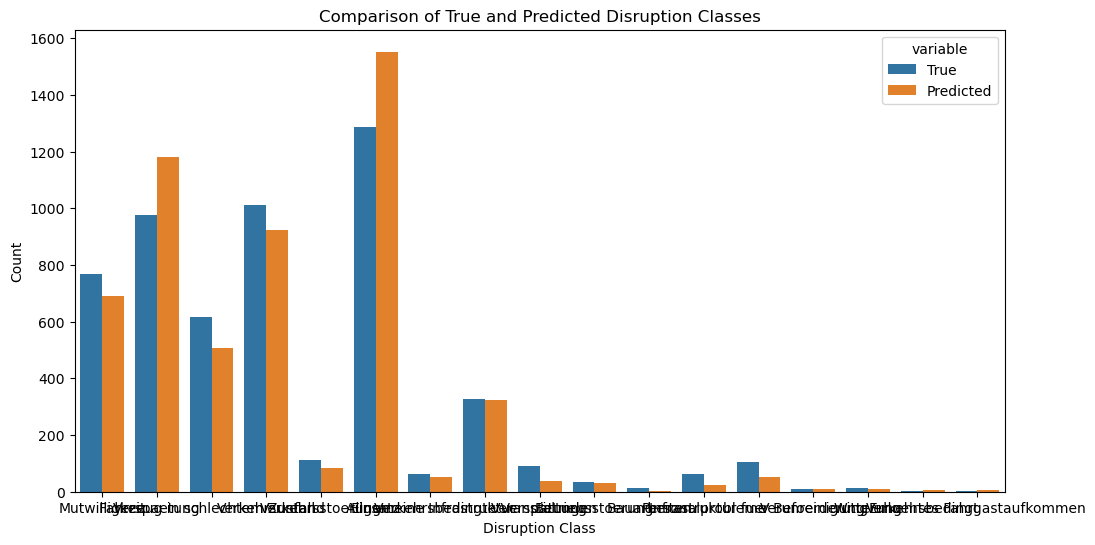

In [64]:
df_compare = pd.DataFrame({"True": y_true, "Predicted": y_pred})
plt.figure(figsize=(12, 6))
sns.countplot(x="value", hue="variable", data=pd.melt(df_compare))
plt.xlabel("Disruption Class")
plt.ylabel("Count")
plt.title("Comparison of True and Predicted Disruption Classes")
plt.show()

In [65]:
from sklearn.metrics import classification_report  

# Generate the classification report with disruption names
# YOUR CODE HERE
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)

print(report)

                                 precision    recall  f1-score   support

       Allgemeine Infrastruktur       0.04      0.03      0.03        64
                    Bauarbeiten       0.33      0.08      0.12        13
               Betriebsstoerung       0.17      0.14      0.15        36
                        Einsatz       0.33      0.40      0.36      1287
    Erhoehtes Fahrgastaufkommen       0.00      0.00      0.00         3
 Fahrzeug in schlechtem Zustand       0.15      0.12      0.13       618
Infrastruktur fuer Befoerderung       0.17      0.09      0.11       104
                  Mutwilligkeit       0.24      0.22      0.23       767
               Personalprobleme       0.05      0.02      0.02        63
                  Veranstaltung       0.26      0.11      0.16        89
                Verkehrsbedingt       0.33      0.50      0.40         4
  Verkehrsbedingte Verspätungen       0.45      0.44      0.44       327
               Verkehrsstoerung       0.21      0.

In [66]:
from sklearn.metrics import multilabel_confusion_matrix

# YOUR CODE HERE
cm = multilabel_confusion_matrix(y_true, y_pred)

labels = label_encoder.classes_


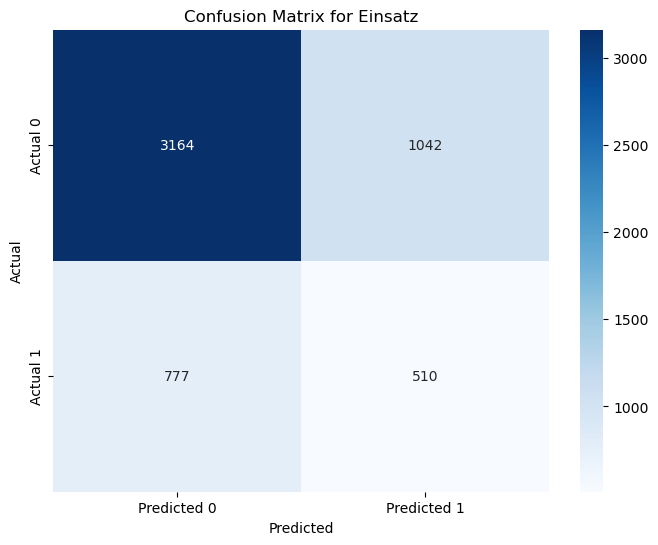

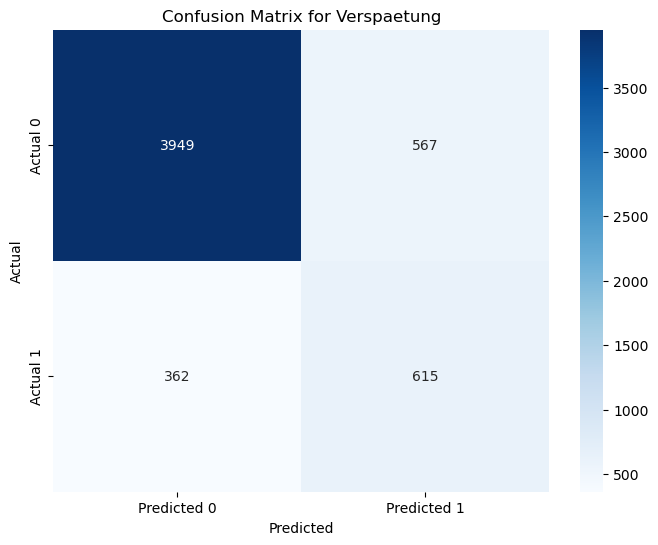

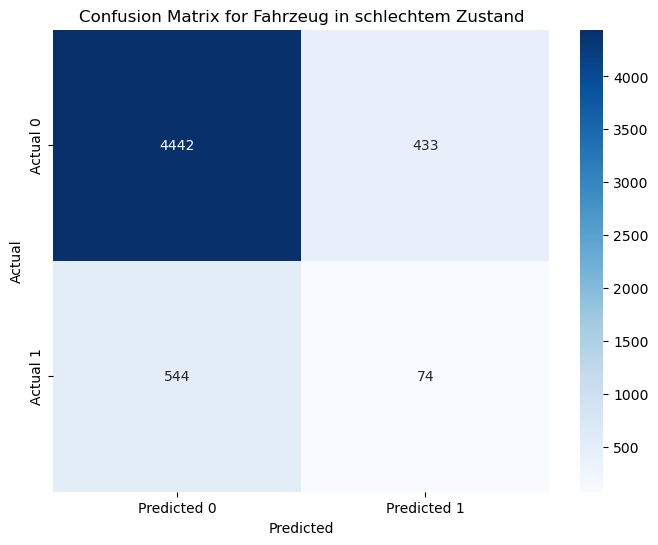

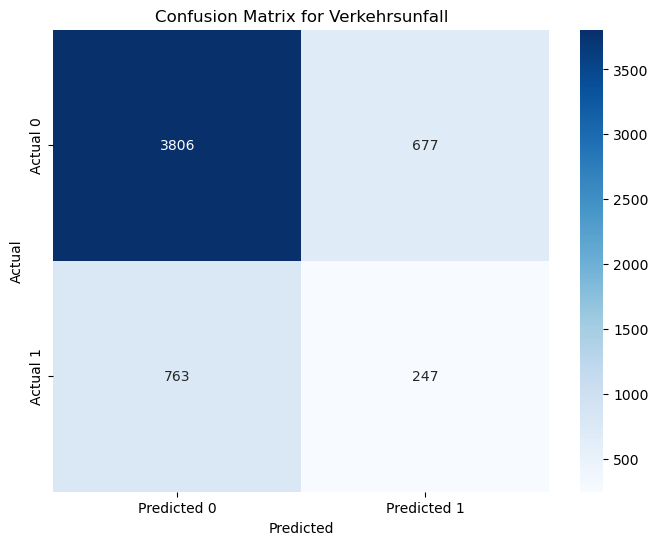

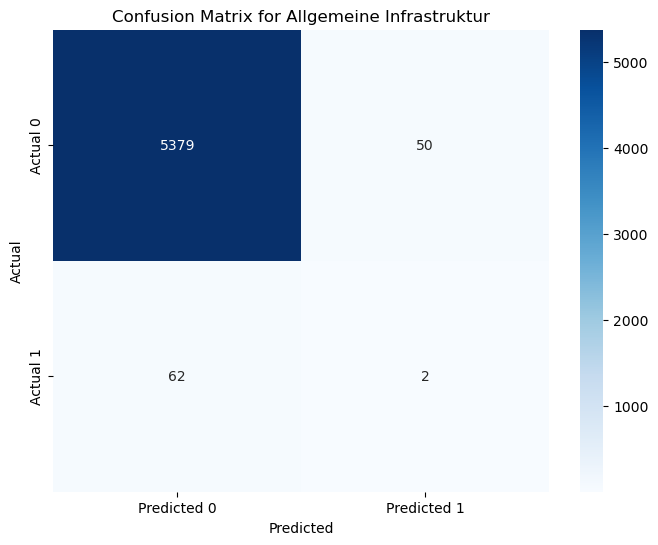

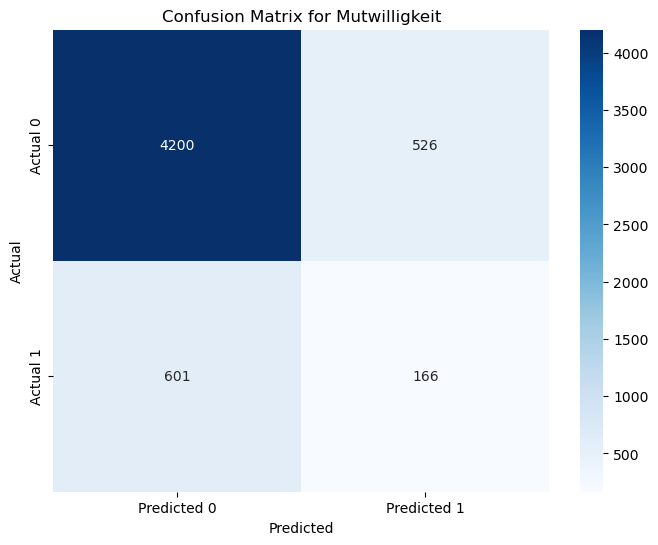

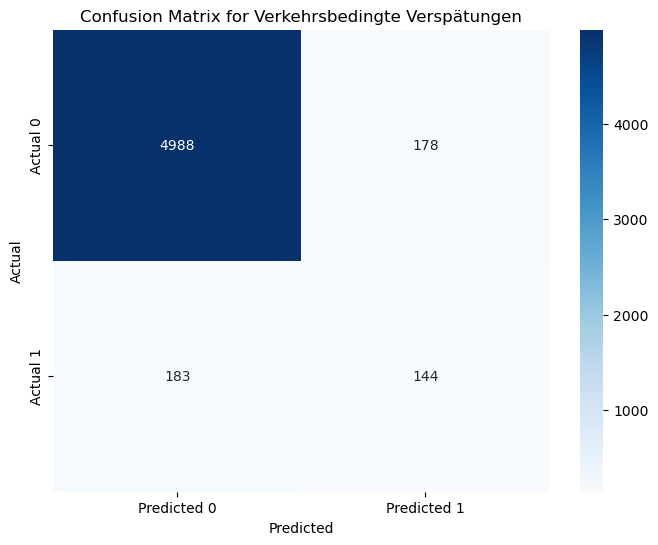

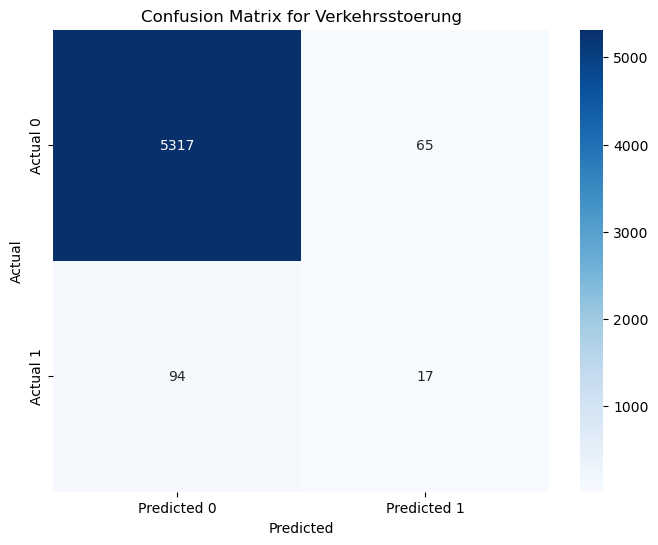

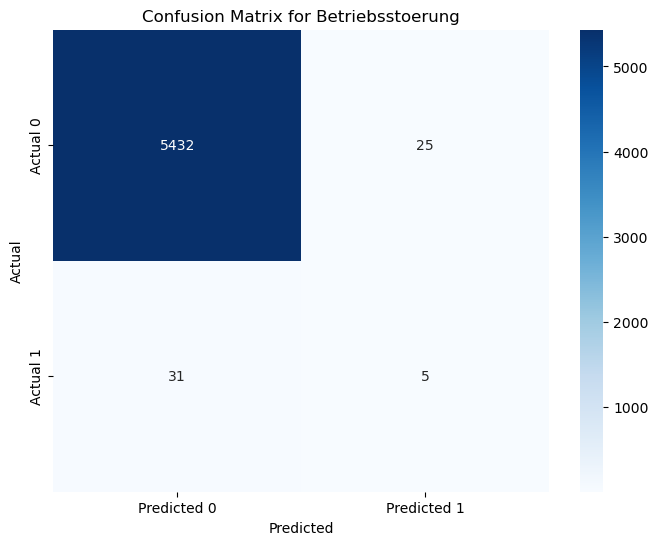

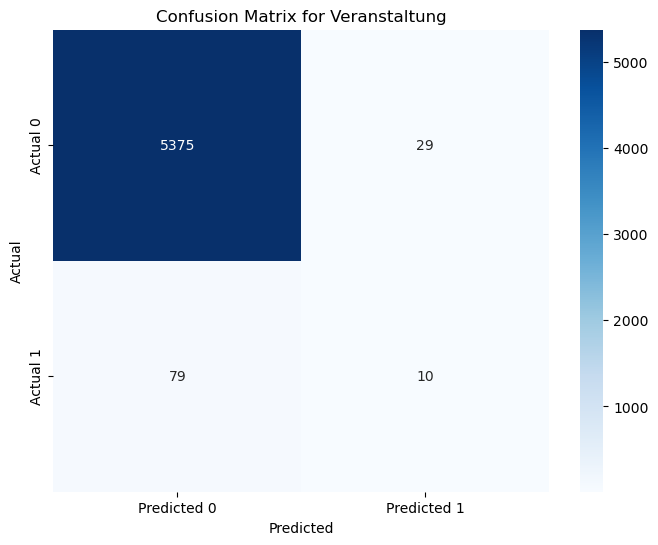

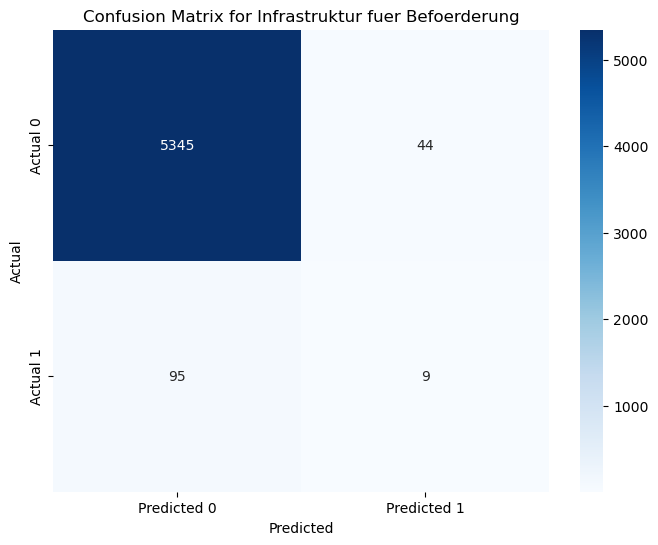

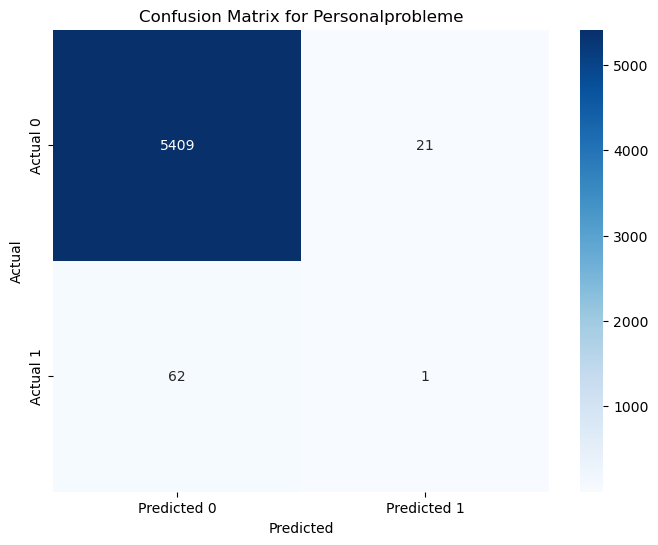

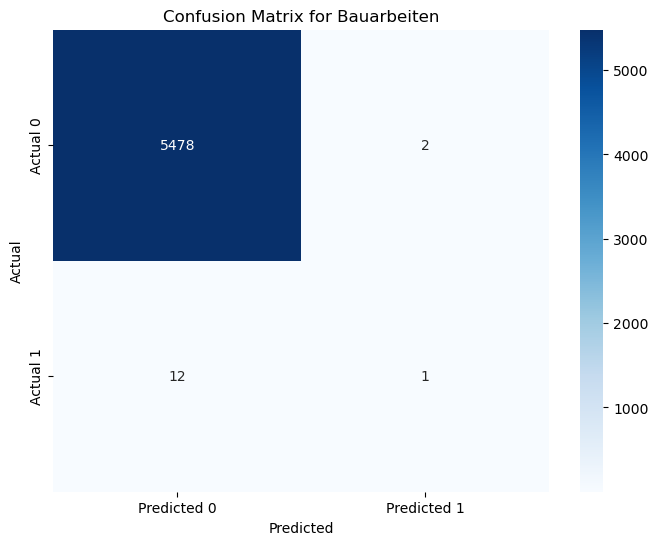

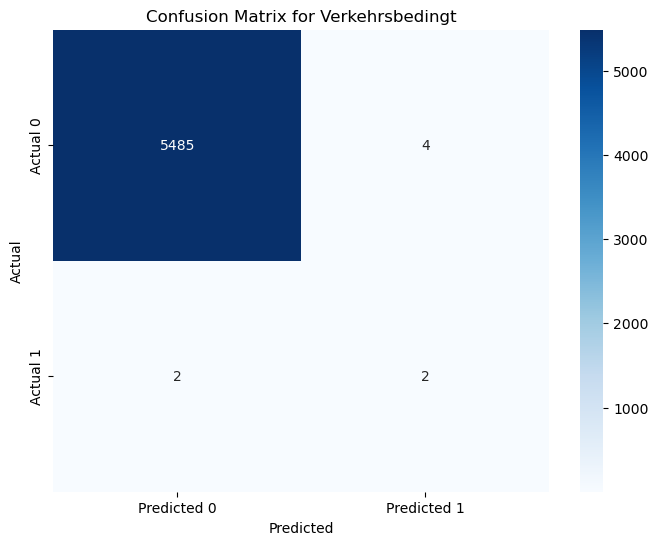

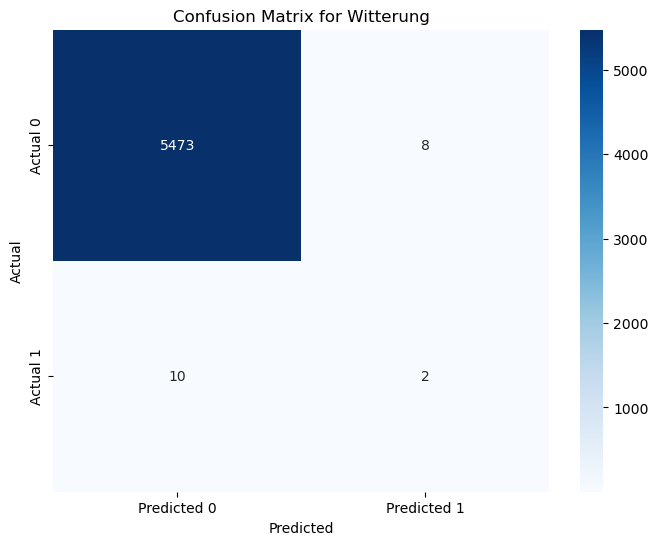

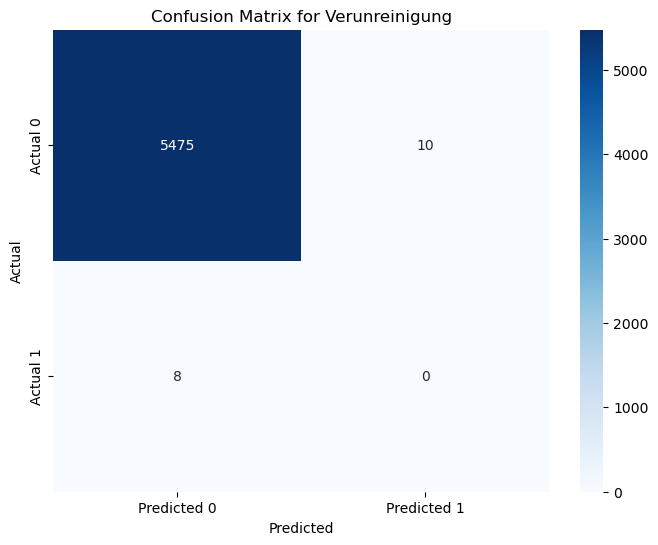

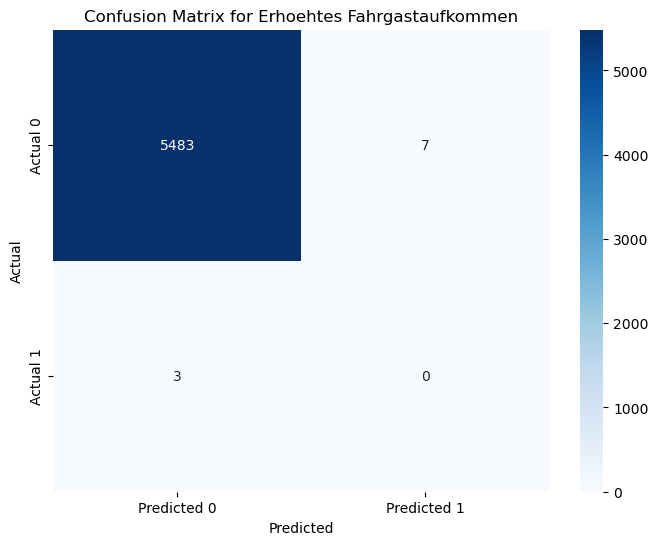

In [67]:
labels = data_processed['disruption'].unique()

# Plot the confusion matrix that was generated in the cell before in a nice format (each class should have its own representation)

def plot_confusion_matrix(cm, class_name):
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {class_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for class_name in labels:
    class_index = data_processed[data_processed['disruption'] == class_name]['class'].iloc[0]
    class_cm = cm[class_index, :, :]
    plot_confusion_matrix(class_cm, class_name)

## Task 8: Test model on unknown data (5 Points)

Use the test data created in task 7.1 (`data_test`) and predict traffic disruptions for this data using the best model you found on the training data.

- Train your selected model using the training data (`data_train`) and predict disruption-`class` for `data_test` feature values.
- Compare the predicted and the real values and generate a confusion matrix to get better insights on the performance of your model.


In [68]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6867 entries, (2018, 3, 16) to (2014, 1, 31)
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp_dailyMin     6867 non-null   float64
 1   temp_dailyMax     6867 non-null   float64
 2   temp_dailyMean    6867 non-null   float64
 3   temp_dailyMedian  6867 non-null   float64
 4   hum_dailyMin      6867 non-null   int64  
 5   hum_dailyMax      6867 non-null   int64  
 6   hum_dailyMean     6867 non-null   float64
 7   wind_dailyMin     6867 non-null   int64  
 8   wind_dailyMax     6867 non-null   int64  
 9   wind_dailyMean    6867 non-null   float64
 10  precip            6867 non-null   float64
 11  bus               6867 non-null   bool   
 12  subway            6867 non-null   bool   
 13  tram              6867 non-null   bool   
 14  duration          6867 non-null   float64
 15  class             6867 non-null   int64  
dtypes: bool(3), float64(8

In [69]:
disruption_types = data_processed['class'].unique()
disruption_types

array([ 3, 14,  5, 13,  0,  7, 11, 12,  2,  9,  6,  8,  1, 10, 16, 15,  4])

### 8.1 Train & predict with best model

In [70]:
def train_and_predict(train_data: pd.DataFrame, test_data: pd.DataFrame):
  predictions = None
  #probabilities = None
  #YOUR CODE HERE
  def train_and_predict(train_data: pd.DataFrame, test_data: pd.DataFrame):
    # Define the features and target column
    features = ['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram']
    target_column = 'disruption'

    # Extract features and target
    X_train = train_data[features]
    y_train = train_data[target_column]
    X_test = test_data[features]

    # RandomForest as the best model
    best_model = RandomForestClassifier(random_state=student_id, criterion='gini')
    
  
    scaler = StandardScaler()

    # Fit and transform the scaler on training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Fit the model on scaled training data
    best_model.fit(X_train_scaled, y_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Make predictions on the test data
    predictions = best_model.predict(X_test_scaled)

  return predictions #, probabilities

In [71]:
# train with train data, predict on hidden test data. For hidden test data, we do not provide the weekly_infections values, of course!
unknown_prediction = train_and_predict(data_train, data_test.drop('class', axis=1)) 

In [72]:
disruption_preds = np.unique(unknown_prediction)
disruption_preds

array([None], dtype=object)

In [73]:
assert len(unknown_prediction.shape) == 1, "Predictions should only have 1 column!"
assert unknown_prediction.shape[0] == data_test.shape[0], "Predictions have the same number of column as test data!"

AttributeError: 'NoneType' object has no attribute 'shape'

In [75]:
len(unknown_prediction)

TypeError: object of type 'NoneType' has no len()

In [76]:
len(data_test)

6867

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!



#### Visualize

Plot your results in the form of a classification report and confusion matrix (one for each class).

In [74]:
from sklearn.metrics import classification_report  

# YOUR CODE HERE
report = classification_report(y_true, y_pred, target_names=disruption_preds)

print(report)

ValueError: Number of classes, 17, does not match size of target_names, 1. Try specifying the labels parameter

In [77]:
from sklearn.metrics import multilabel_confusion_matrix

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [78]:
labels = data_processed['disruption'].unique()

def plot_confusion_matrix(cm, class_name):
    # YOUR CODE HERE
    raise NotImplementedError()

for class_name in labels:
    class_index = data_processed[data_processed['disruption'] == class_name]['class'].iloc[0]
    class_cm = cm[class_index, :, :]
    plot_confusion_matrix(class_cm, class_name)

NotImplementedError: 

### 8.2 Summarize your findings / Lessons Learned

Summarize your findings below: what did you try and what are your observations?

Please reflect on your approach, the method you've chosen and how you've tuned it as well as on differences between validation and test set. Also, please make sure to restrict your answer to not more than 200 words.

YOUR ANSWER HERE
We explored this dataset in terms of the relationship between multiple independent variables to a dependent variable. We used multiple scaling, feature selection and algorithms such as RandomForest Classifier, SVM, and kNeighbors classifier to model this relationship.
I have learned that a model cannot perform that well if there is only one variable that has predicitve power. The temperature was initially seen in the correlation matrix as having a positive correlation with the target column, disruption. 
The prediction supports this hypothesis as we can also see the accuracy scores being really low (0.32), even after trying to train the model with different fit the model after using different preprocessing steps such as scaling. 
Furthermore, the predictions metrics remained to be still low even after scaling, therefore this step was not really necessary for this dataset.
There was a really small improvement after implementing cross validation with the 3 defined paramenter to an accuracy of 0.34, still not a good accuracy score. 
I did not manage to test the model on the test data but going by the scores on the train validation, then we cannot really predict disruptions accurately given the selected vvariables. 